# Upgrading Scikit Learn Library

In [ ]:
!pip install scikit-learn==1.5.1

# Importing Dependencies & Dataset

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [ ]:
# loading the house price dataset to a pandas dataFrame
car_data = pd.read_csv('/content/Project 7 Car Price Prediction.csv')

# Exploratory Data Analysis

In [ ]:
# first 5 rows in the dataset
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
# last 5 rows in the dataset
car_data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
# number of rows & columns
car_data.shape

(4340, 8)

In [ ]:
# getting info about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# checking null values
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# getting the stats about dataset
car_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
#setting the figure parameters
plt.rcParams['figure.dpi'] = 100

In [ ]:
sns.set_style("ticks")
sns.set_palette("dark")

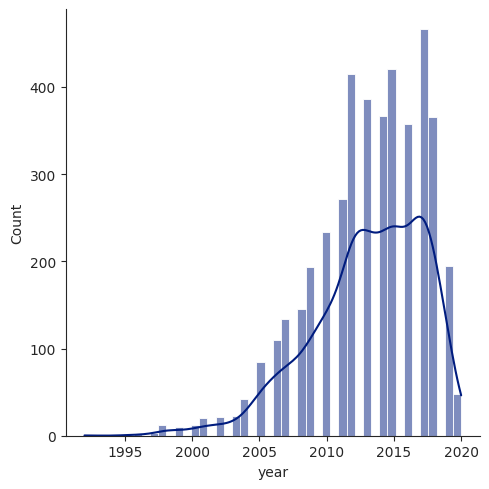

In [ ]:
# distribution plot for year
sns.displot(data=car_data, x = 'year', kde=True)

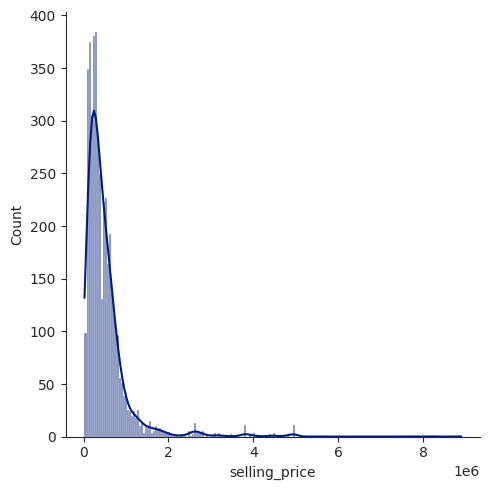

In [ ]:
# distribution plot for selling_price
sns.displot(data=car_data, x = 'selling_price', kde=True)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000'),
  Text(800000.0, 0, '800000'),
  Text(900000.0, 0, '900000')])

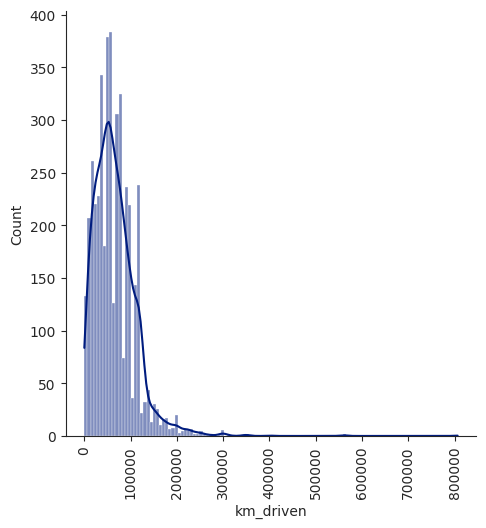

In [ ]:
#distribution plot for km_driven
sns.displot(x='km_driven',data=car_data,kde=True)
#writing x label at 180degreee
plt.xticks(rotation=90)

<Axes: xlabel='fuel', ylabel='count'>

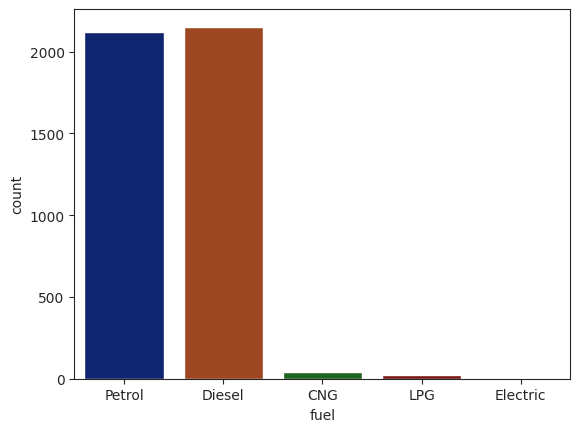

In [ ]:
#count plot for fuel
sns.countplot(data=car_data,x='fuel',hue='fuel')

<Axes: xlabel='seller_type', ylabel='count'>

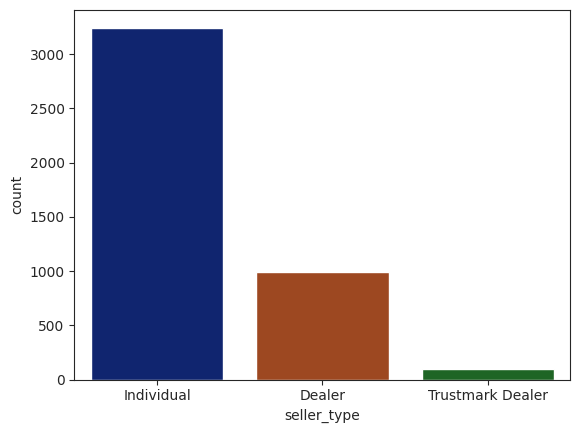

In [ ]:
#count plot for seller_type
sns.countplot(data=car_data,x='seller_type',hue='seller_type')

<Axes: xlabel='transmission', ylabel='count'>

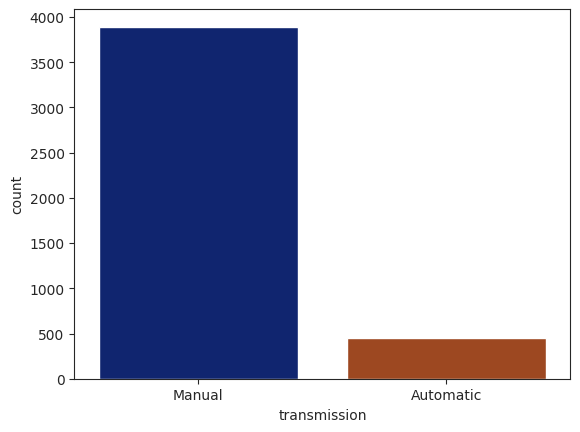

In [ ]:
#count plot for transmission
sns.countplot(data=car_data,x='transmission',hue='transmission')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Fourth & Above Owner'),
  Text(3, 0, 'Third Owner'),
  Text(4, 0, 'Test Drive Car')])

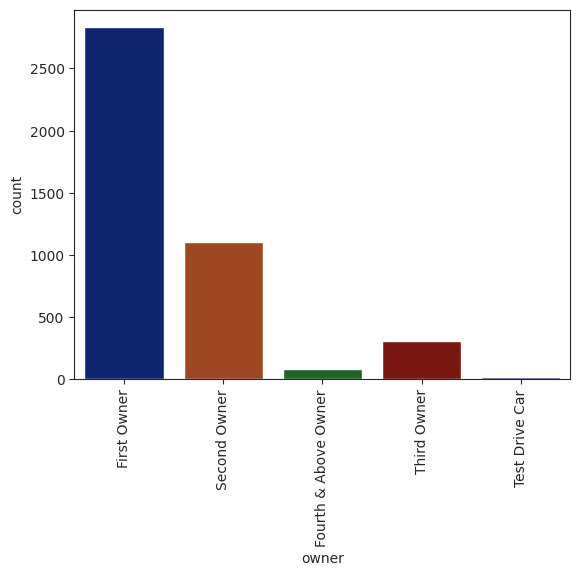

In [ ]:
#count plot for owner
sns.countplot(data=car_data,x='owner',hue='owner')
#writing x label at 180degreee
plt.xticks(rotation=90)

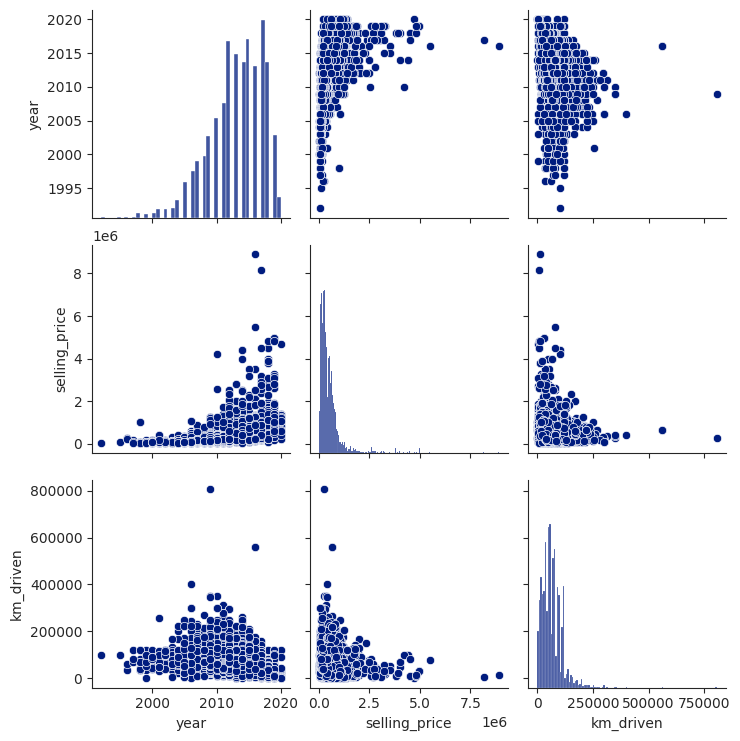

In [ ]:
# pairplot for the dataset
sns.pairplot(car_data)

In [ ]:
car_data['owner'].dtype

dtype('O')

In [ ]:
car_data.drop(columns=['name'],axis=1,inplace=True)

In [ ]:
#setting the figure parameters
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 200

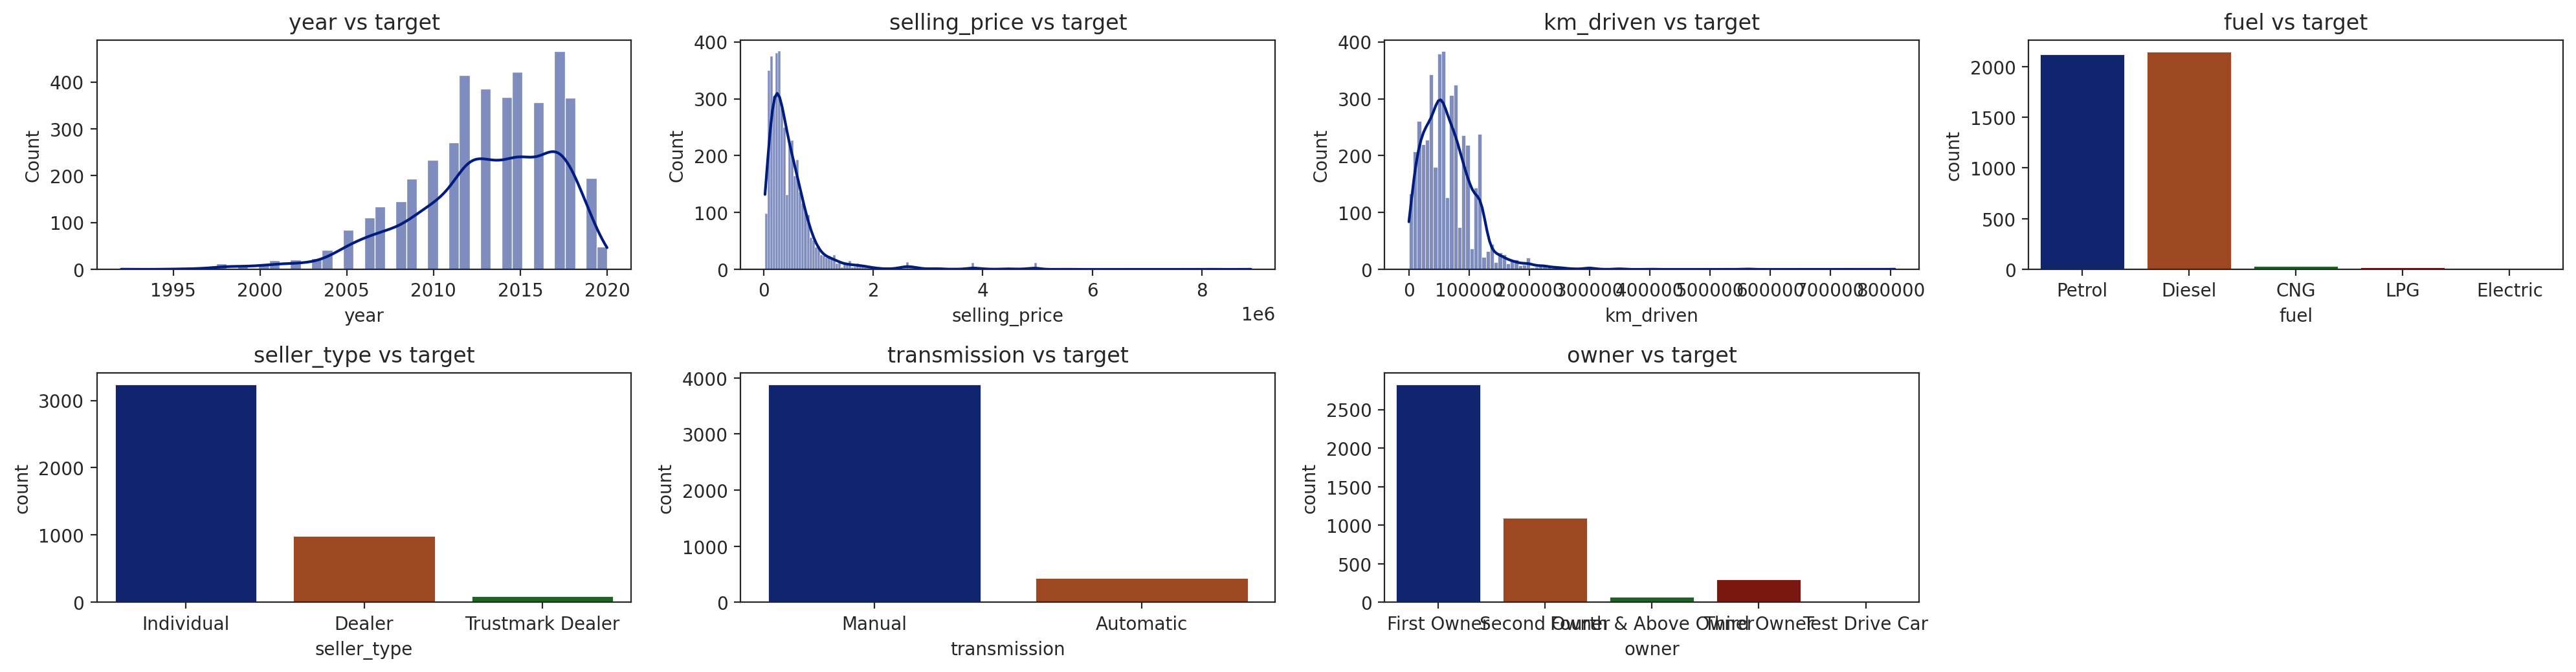

In [ ]:
#plotting the histplot for each column in dataset using subplots
columns = car_data.columns
for i, col in enumerate(columns):
    plt.subplot(4,4, i+1)
    if car_data[col].dtype == 'object':
        sns.countplot(x=col, data=car_data,hue=col)
    else:
      sns.histplot(x=col, data=car_data,kde=True)
    plt.xlabel(col)
    plt.title("{} vs target".format(col))
    plt.tight_layout()

# Data Preprocessing & Splitting

Replacing the outliers with mean values according to target

In [ ]:
# checking the numnber of outliers in selling_price
car_data[car_data['selling_price']>5000000].shape

(3, 7)

In [ ]:
car_data = car_data[car_data['selling_price'] <= 5000000]

In [ ]:
# checking the numnber of outliers in km_driven
car_data[car_data['km_driven']>250000].shape

(20, 7)

In [ ]:
# taking only those values who has km_driven <= 250000
car_data = car_data[car_data['km_driven'] <= 250000]

In [ ]:
# checking the numnber of outliers in fuel
car_data[car_data['fuel'] == 'Electric'].shape

(0, 7)

In [ ]:
#dropping the fuel = electric
car_data = car_data[car_data['fuel'] != 'Electric']

In [ ]:
# checking the numnber of outliers in LPG
car_data[car_data['fuel'] == 'LPG'].shape

(23, 7)

In [ ]:
#dropping the fuel = LPG
car_data = car_data[car_data['fuel'] != 'LPG']

In [ ]:
# checking the numnber of outliers in seller_type
car_data[car_data['seller_type'] == 'Trustmark Dealer'].shape

(102, 7)

In [ ]:
# checking the numnber of outliers in owner
car_data[car_data['owner'] == 'Test Drive Car'].shape

(17, 7)

In [ ]:
#dropping the owner = Test Drive Car
car_data = car_data[car_data['owner'] != 'Test Drive Car']

In [ ]:
# shape after droping outleirs
car_data.shape

(4296, 7)

In [ ]:
# seperating the data and labels
X = car_data.drop(columns=['selling_price'],axis=1)
y = car_data['selling_price']

In [ ]:
#importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

In [ ]:
# spliting the data in training & testing data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(4296, 6) (3436, 6) (860, 6)


In [ ]:
# saving the all columns of training data
all_columns = X_train.columns

One-Hot Encoding

In [ ]:
#importing OneHotEncoder for preprocessing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#loading the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
cat_cols = ['fuel','owner','transmission','seller_type']

In [ ]:
#fitting the categorical columns to encoder
X_train_encoded = encoder.fit_transform(X_train[cat_cols])

In [ ]:
#storing the encoding columns
encoded_columns = encoder.get_feature_names_out(cat_cols)

In [ ]:
# Create a DataFrame with the encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns)

In [ ]:
# Add the remaining non-categorical columns
X_train_final_encoded = pd.concat([X_train.drop(cat_cols, axis=1).reset_index(drop=True), X_train_encoded_df], axis=1)

In [ ]:
X_train_final_encoded.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,2005,120000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2007,80000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2015,90000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2015,72000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2013,3240,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#checking is there any loss of data
X_train_final_encoded.isnull().sum()

year                            0
km_driven                       0
fuel_CNG                        0
fuel_Diesel                     0
fuel_Petrol                     0
owner_First Owner               0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Third Owner               0
transmission_Automatic          0
transmission_Manual             0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
dtype: int64

Data Standardization

In [ ]:
# importing the Standard Scaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# saving the all columns of training data
training_columns = X_train_final_encoded.columns

In [ ]:
#scaling the training data
X_train_encoded = scaler.fit_transform(X_train_final_encoded)

In [ ]:
print(X_train_encoded)

[[-1.94022088  1.18404966 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]
 [-1.46215714  0.30009296 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]
 [ 0.45009785  0.52108213 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]
 ...
 [-2.41828463  1.18404966 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]
 [-1.70118901  0.96306049 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]
 [ 0.9281616   0.07910378 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]]


In [ ]:
# Create a DataFrame with the encoded features
X_train_encoded_scaled = pd.DataFrame(X_train_encoded, columns=training_columns)

In [ ]:
X_train_encoded_scaled.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,-1.940221,1.184050,-0.095416,-0.996514,1.014659,-1.385383,-0.137767,1.704273,-0.269712,-0.337307,0.337307,-0.537872,0.574662,-0.15636
1,-1.462157,0.300093,-0.095416,-0.996514,1.014659,-1.385383,-0.137767,-0.586761,3.707665,-0.337307,0.337307,-0.537872,0.574662,-0.15636
2,0.450098,0.521082,-0.095416,1.003499,-0.985553,0.721822,-0.137767,-0.586761,-0.269712,-0.337307,0.337307,-0.537872,0.574662,-0.15636
3,0.450098,0.123302,-0.095416,1.003499,-0.985553,0.721822,-0.137767,-0.586761,-0.269712,-0.337307,0.337307,-0.537872,0.574662,-0.15636
4,-0.027966,-1.396220,-0.095416,-0.996514,1.014659,-1.385383,-0.137767,1.704273,-0.269712,-0.337307,0.337307,-0.537872,0.574662,-0.15636


In [ ]:
#checking the number of rows and columns
X_train_encoded_scaled.shape

(3436, 14)

# Model Selection

Comparing the models with default hyperparameter values using Cross Validation

In [ ]:
# importing the standard classification models from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
# all models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

In [ ]:
# importing cross validation score function to calculate the cross validation score
from sklearn.model_selection import cross_val_score

In [ ]:
# defining a function who can give you cross validation scores on given data with given set of model
def compare_models_cross_validation(models,X,y):
  for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5,scoring='r2')
    mean_r2 = cv_score.mean()
    print(f"Model: {name}")
    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Mean R square score of the ',model,'=',mean_r2)
    print("="*50)

In [ ]:
# calling the compare function for the models we choose
compare_models_cross_validation(models,X_train_encoded_scaled,y_train)

Model: Linear Regression
Cross Validation accuracies for the LinearRegression() = [0.48561169 0.52266347 0.49556478 0.44618265 0.44512282]
Acccuracy score of the  LinearRegression() = 47.90290829649664 %
Model: Ridge
Cross Validation accuracies for the Ridge() = [0.48667531 0.52294865 0.49561939 0.44478188 0.44506884]
Acccuracy score of the  Ridge() = 47.9018813909708 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.312e+12, tolerance: 8.586e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.265e+12, tolerance: 8.374e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.352e+12, tolerance: 8.611e

Model: Lasso
Cross Validation accuracies for the Lasso() = [0.48666925 0.52295642 0.49561445 0.44476022 0.44508059]
Acccuracy score of the  Lasso() = 47.90161857634855 %
Model: RandomForestRegressor
Cross Validation accuracies for the RandomForestRegressor() = [0.53007682 0.77732181 0.66819908 0.68870345 0.70420846]
Acccuracy score of the  RandomForestRegressor() = 67.37019244244684 %
Model: XGBoost
Cross Validation accuracies for the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_

Top 3:

RandomForestRegressor() = 0.6737019244244684

XGBRegressor() = 0.661702287197113

LinearRegression() = 0.4790290829649664

# Function for Feature Selection

In [ ]:
#importing the RFE
from sklearn.feature_selection import RFE

In [ ]:
# defining a function who will give you n best features for the given model and data
def find_best_feature(n,mdl,X,y):
    model = mdl
    rfe = RFE(model, n_features_to_select=n, verbose=0)
    rfe = rfe.fit(X, y)
    selected_col = X.columns[rfe.support_]
    cv_score = cross_val_score(model,X[selected_col],y, cv=5,scoring='r2')
    mean_r2 = cv_score.mean()
    print("Selected columns: ", list(selected_col))
    print(n, mean_r2)
    print("----------------------\n")
    return list(selected_col),mean_r2

# 1. XG Boost Regressor

XG Boost Regressor Model as the 2nd highest r2 based on cross validation score according to its default hyperparameters

XGBRegressor() = 0.6737019244244684

In [ ]:
# loading the XG Boost Regressor model
xgb = XGBRegressor()

In [ ]:
# getting the best features of XG Boost Regressor by calling the feature selection function
best_score_xgb = 0
best_features_xgb = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,xgb,X_train_encoded_scaled,y_train)
    if best_score_xgb < score:
        best_score_xgb = score
        best_features_xgb = col
print(best_features_xgb)
print(best_score_xgb)

Selected columns:  ['transmission_Automatic']
1 28.154606819152832
----------------------

Selected columns:  ['fuel_Diesel', 'transmission_Automatic']
2 43.37378144264221
----------------------

Selected columns:  ['year', 'fuel_Diesel', 'transmission_Automatic']
3 59.73794341087342
----------------------

Selected columns:  ['year', 'fuel_Diesel', 'transmission_Automatic', 'seller_type_Individual']
4 62.12848782539368
----------------------

Selected columns:  ['year', 'km_driven', 'fuel_Diesel', 'transmission_Automatic', 'seller_type_Individual']
5 66.51006817817688
----------------------

Selected columns:  ['year', 'km_driven', 'fuel_Diesel', 'transmission_Automatic', 'seller_type_Dealer', 'seller_type_Individual']
6 66.18078947067261
----------------------

Selected columns:  ['year', 'km_driven', 'fuel_Diesel', 'transmission_Automatic', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer']
7 66.10190749168396
----------------------

Selected columns:  [

Best Features : ['year', 'km_driven', 'fuel_Diesel', 'owner_First Owner', 'transmission_Automatic', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer']

Best Score : 67.62073278427124%

In [ ]:
# using a diffferent df to store
X_train_best_features_xgb = X_train_encoded_scaled[best_features_xgb]

In [ ]:
# getting the cross val score of xgb with its best features
cv_score_xgb = cross_val_score(xgb, X_train_best_features_xgb, y_train, cv=5)
print(cv_score_xgb)
print(cv_score_xgb.mean())

[0.56567085 0.75729507 0.64924556 0.69968009 0.70914507]
0.6762073278427124


In [ ]:
# fitting the default model with its best features
xgb.fit(X_train_best_features_xgb,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Test Data Preprocessing

In [ ]:
#fitting the categorical columns to encoder
X_test_encoded = encoder.transform(X_test[cat_cols])

In [ ]:
# Create a DataFrame with the encoded features
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns)

In [ ]:
# Add the remaining non-categorical columns
X_test_final_encoded = pd.concat([X_test.drop(cat_cols, axis=1).reset_index(drop=True), X_test_encoded_df], axis=1)

In [ ]:
X_test_final_encoded.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,2011,70000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2014,60000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2019,5000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2012,49824,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2014,30000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#scaling the training data
X_test_scaled = scaler.transform(X_test_final_encoded)

In [ ]:
print(X_test_scaled)

[[-0.50602964  0.07910378 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]
 [ 0.21106598 -0.14188539 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]
 [ 1.40622535 -1.35732586 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]
 ...
 [ 1.16719347 -1.03532253 -0.09541624 ...  1.85917991 -1.74015401
  -0.1563599 ]
 [-0.50602964  0.12330162 -0.09541624 ...  1.85917991 -1.74015401
  -0.1563599 ]
 [ 0.45009785  0.52108213 -0.09541624 ... -0.53787156  0.57466178
  -0.1563599 ]]


In [ ]:
X_test_encoded_scaled = pd.DataFrame(X_test_scaled, columns=training_columns)

In [ ]:
X_test_encoded_scaled.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,-0.506030,0.079104,-0.095416,1.003499,-0.985553,-1.385383,-0.137767,1.704273,-0.269712,-0.337307,0.337307,-0.537872,0.574662,-0.15636
1,0.211066,-0.141885,-0.095416,-0.996514,1.014659,-1.385383,-0.137767,1.704273,-0.269712,-0.337307,0.337307,-0.537872,0.574662,-0.15636
2,1.406225,-1.357326,-0.095416,1.003499,-0.985553,0.721822,-0.137767,-0.586761,-0.269712,-0.337307,0.337307,-0.537872,0.574662,-0.15636
3,-0.266998,-0.366764,-0.095416,-0.996514,1.014659,0.721822,-0.137767,-0.586761,-0.269712,-0.337307,0.337307,1.859180,-1.740154,-0.15636
4,0.211066,-0.804853,-0.095416,-0.996514,1.014659,0.721822,-0.137767,-0.586761,-0.269712,-0.337307,0.337307,-0.537872,0.574662,-0.15636


In [ ]:
#checking the number of rows and columns
X_test_encoded_scaled.shape

(860, 14)

In [ ]:
# taking only best features of xgb to test data
X_test_best_features_xgb = X_test_encoded_scaled[best_features_xgb]

In [ ]:
best_features_xgb

['year',
 'km_driven',
 'fuel_Diesel',
 'owner_First Owner',
 'transmission_Automatic',
 'seller_type_Dealer',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer']

In [ ]:
# predicting the labels on test data
y_predict_xgb = xgb.predict(X_test_best_features_xgb)

In [ ]:
#importing mae,mse,rmse,r2 for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_xgb = mean_absolute_error(y_test, y_predict_xgb)
mse_xgb = mean_squared_error(y_test, y_predict_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_predict_xgb)
r2_xgb = r2_score(y_test, y_predict_xgb)

In [ ]:
print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):",mse_xgb)
print("Root Mean Squared Error (RMSE):" ,rmse_xgb)
print("R-squared (R2):", r2_xgb)

Mean Absolute Error (MAE): 169477.9142668968
Mean Squared Error (MSE): 115695793178.76097
Root Mean Squared Error (RMSE): 340140.84314995306
R-squared (R2): 0.5900038480758667


# Hyperparameter Tuning : XG Boost Regressor

In [ ]:
# parameters for XG Boost regressor
params_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3,5,10],
    'min_child_weight': [2,5,10]
    }

In [ ]:
# importing gridsearchcv to check the best hyperparameters
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, cv=5, n_jobs=-1)
grid_xgb.fit(X_train_best_features_xgb, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 10],
                         'min_child_weight': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [ ]:
# getting the best hyperparameters
print(grid_xgb.best_estimator_, grid_xgb.best_params_, grid_xgb.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) {'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 500} 0.692386782169342


In [ ]:
# testing grid_xgb model on test data
y_predict_grid_xgb = grid_xgb.predict(X_test_best_features_xgb)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_grid_xgb = mean_absolute_error(y_test, y_predict_grid_xgb)
mse_grid_xgb = mean_squared_error(y_test, y_predict_grid_xgb)
rmse_grid_xgb = root_mean_squared_error(y_test, y_predict_grid_xgb)
r2_grid_xgb = r2_score(y_test, y_predict_grid_xgb)

print("Mean Absolute Error (MAE):", mae_grid_xgb)
print("Mean Squared Error (MSE):",mse_grid_xgb)
print("Root Mean Squared Error (RMSE):" ,rmse_grid_xgb)
print("R-squared (R2):", r2_grid_xgb)

Mean Absolute Error (MAE): 169528.83796329942
Mean Squared Error (MSE): 102426772269.20392
Root Mean Squared Error (RMSE): 320041.82893678744
R-squared (R2): 0.6370258331298828


Best Parameters : {'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 500}

# Final Model : XG Boost Regressor

In [ ]:
# loading the model with best hyper parameter
model1 = XGBRegressor(learning_rate= 0.01, max_depth= 10,min_child_weight= 10, n_estimators= 500)

In [ ]:
# fitting the training data with best features of rfr
model1.fit(X_train_best_features_xgb,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluation : XG Boost Regressor

In [ ]:
# predicting the train data
y_predict_train_model1 = model1.predict(X_train_best_features_xgb)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_train_model1 = mean_absolute_error(y_train, y_predict_train_model1)
mse_train_model1 = mean_squared_error(y_train, y_predict_train_model1)
rmse_train_model1 = root_mean_squared_error(y_train, y_predict_train_model1)
r2_train_model1 = r2_score(y_train, y_predict_train_model1)

In [ ]:
print("Model3 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model1)
print("Mean Squared Error (MSE):",mse_train_model1)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model1)
print("R-squared (R2):", r2_train_model1)

Model3 on Training Data:
Mean Absolute Error (MAE): 125643.63446549403
Mean Squared Error (MSE): 45850360747.42633
Root Mean Squared Error (RMSE): 214126.97342330866
R-squared (R2): 0.8497033715248108


In [ ]:
# predicting the test data
y_predict_test_model1 = model1.predict(X_test_best_features_xgb)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_test_model1 = mean_absolute_error(y_test, y_predict_test_model1)
mse_test_model1 = mean_squared_error(y_test, y_predict_test_model1)
rmse_test_model1 = root_mean_squared_error(y_test, y_predict_test_model1)
r2_test_model1 = r2_score(y_test, y_predict_test_model1)

In [ ]:
print("Model3 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model1)
print("Mean Squared Error (MSE):",mse_test_model1)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model1)
print("R-squared (R2):", r2_test_model1)

Model3 on Test Data:
Mean Absolute Error (MAE): 169528.83796329942
Mean Squared Error (MSE): 102426772269.20392
Root Mean Squared Error (RMSE): 320041.82893678744
R-squared (R2): 0.6370258331298828


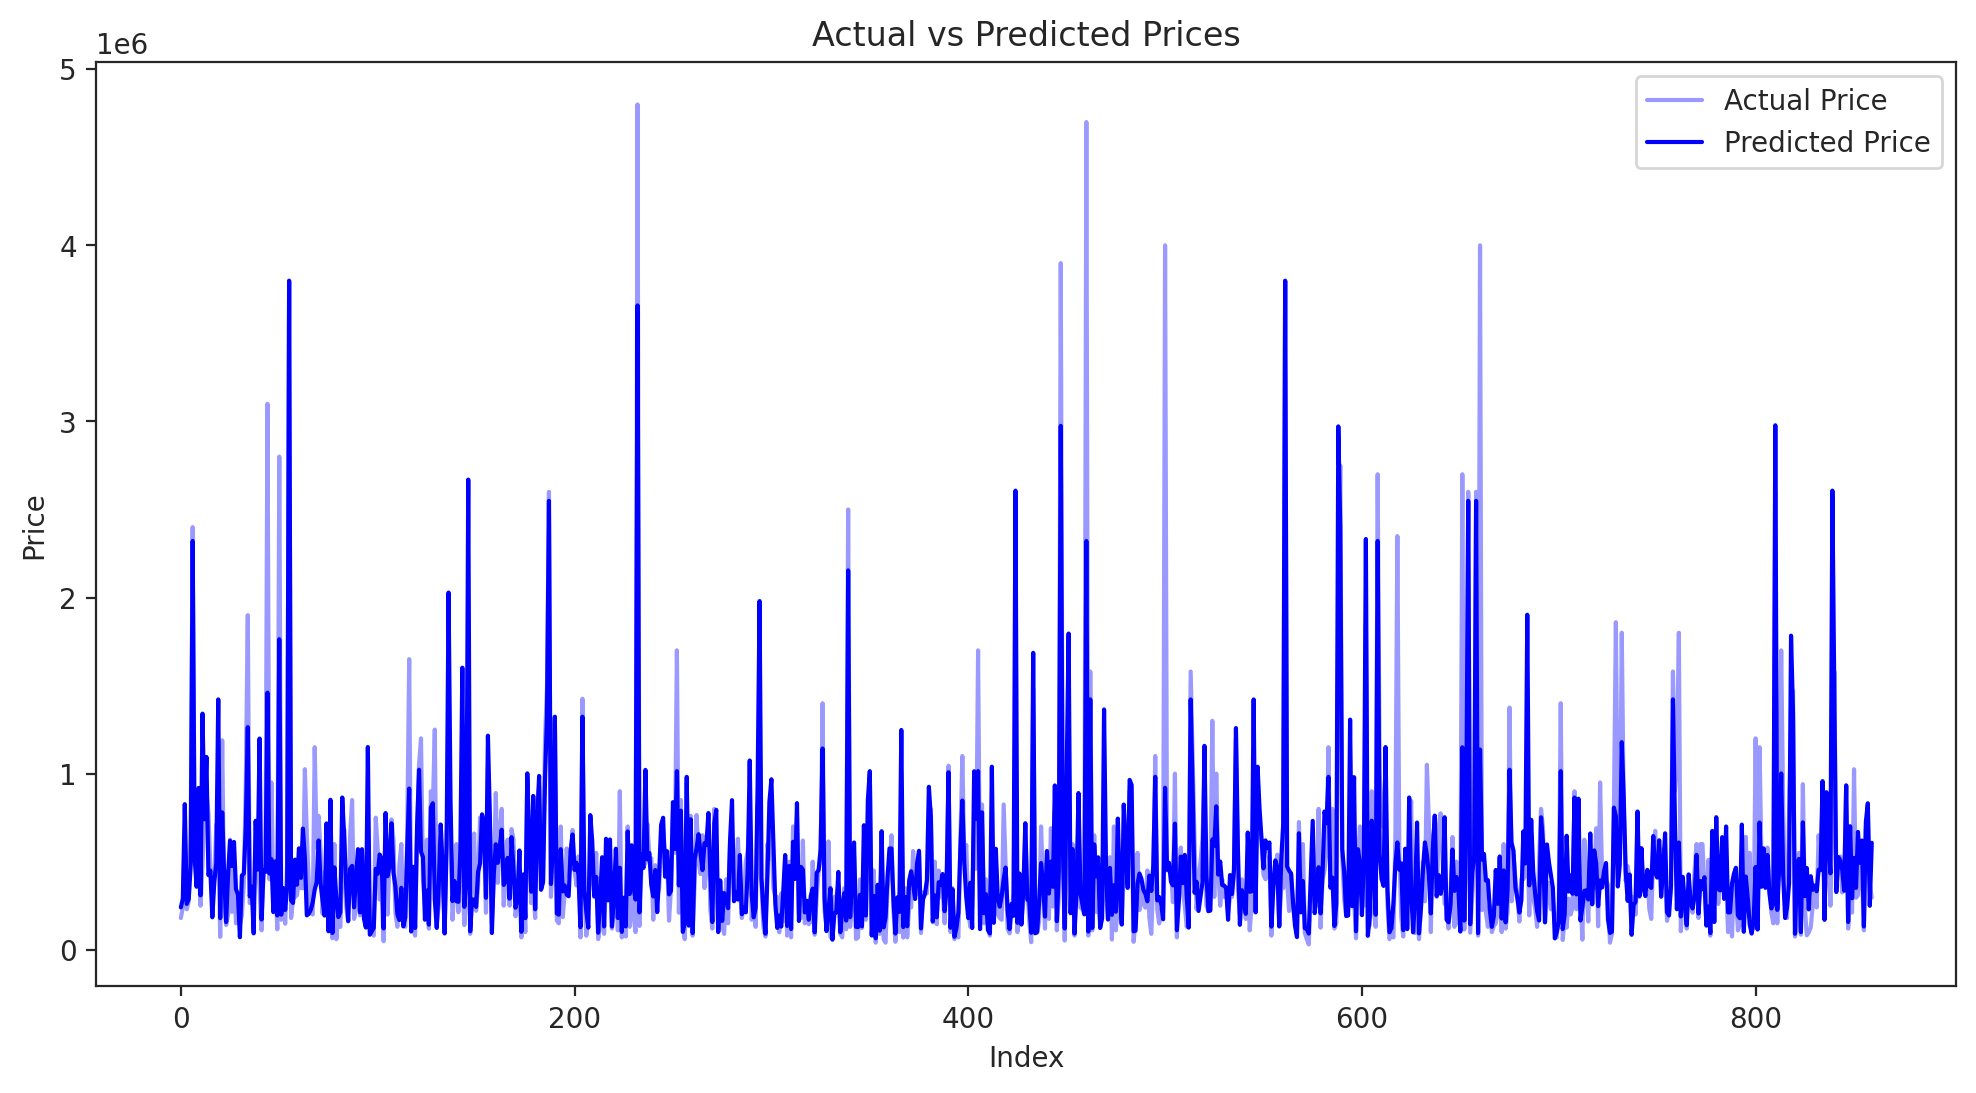

In [ ]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, color='blue', label='Actual Price',alpha=0.4)
plt.plot(indices, y_predict_test_model1, color='blue', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# 2. RandomForestRegressor

In [ ]:
# loading the Random Forest Regressor model
rfr = RandomForestRegressor()

In [ ]:
# getting the best features of RFC by calling the feature selection function
best_score_rfr = 0
best_features_rfr = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,rfr,X_train_encoded_scaled,y_train)
    if best_score_rfr < score:
        best_score_rfr = score
        best_features_rfr = col
print(best_features_rfr)
print(best_score_rfr)

Selected columns:  ['km_driven']
1 6.540642515252457
----------------------

Selected columns:  ['km_driven', 'transmission_Automatic']
2 37.25659365235679
----------------------

Selected columns:  ['year', 'km_driven', 'transmission_Automatic']
3 56.8183722727125
----------------------

Selected columns:  ['year', 'km_driven', 'fuel_Diesel', 'transmission_Automatic']
4 66.66440133299953
----------------------

Selected columns:  ['year', 'km_driven', 'fuel_Diesel', 'transmission_Automatic', 'transmission_Manual']
5 66.48411509726004
----------------------

Selected columns:  ['year', 'km_driven', 'fuel_Diesel', 'fuel_Petrol', 'transmission_Automatic', 'transmission_Manual']
6 66.35609745109352
----------------------

Selected columns:  ['year', 'km_driven', 'fuel_Diesel', 'fuel_Petrol', 'transmission_Automatic', 'transmission_Manual', 'seller_type_Dealer']
7 68.37711272071726
----------------------

Selected columns:  ['year', 'km_driven', 'fuel_Diesel', 'fuel_Petrol', 'transmission_

In [ ]:
# using a diffferent df to store
X_train_best_features_rfr = X_train_encoded_scaled[best_features_rfr]

In [ ]:
# getting the cross val score of rfr with its best features
cv_score_rfr = cross_val_score(rfr, X_train_best_features_rfr, y_train, cv=5)
print(cv_score_rfr)
print(cv_score_rfr.mean())

[0.56294147 0.76599968 0.68148107 0.68178181 0.70958576]
0.6803579583768403


In [ ]:
# fitting the default model with its best features
rfr.fit(X_train_best_features_rfr,y_train)

RandomForestRegressor()

In [ ]:
# taking only best features of lr to test data
X_test_best_features_rfr = X_test_encoded_scaled[best_features_rfr]

In [ ]:
best_features_rfr

['year',
 'km_driven',
 'fuel_CNG',
 'fuel_Diesel',
 'fuel_Petrol',
 'owner_First Owner',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Third Owner',
 'transmission_Automatic',
 'transmission_Manual',
 'seller_type_Dealer',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer']

In [ ]:
# predicting the labels on test data
y_predict_rfr = rfr.predict(X_test_best_features_rfr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_rfr = mean_absolute_error(y_test, y_predict_rfr)
mse_rfr = mean_squared_error(y_test, y_predict_rfr)
rmse_rfr = root_mean_squared_error(y_test, y_predict_rfr)
r2_rfr = r2_score(y_test, y_predict_rfr)

In [ ]:
print("Mean Absolute Error (MAE):", mae_rfr)
print("Mean Squared Error (MSE):",mse_rfr)
print("Root Mean Squared Error (RMSE):" ,rmse_rfr)
print("R-squared (R2):", r2_rfr)

Mean Absolute Error (MAE): 166015.03932725292
Mean Squared Error (MSE): 98462847617.61804
Root Mean Squared Error (RMSE): 313787.90228053415
R-squared (R2): 0.6510730037918027


# Hyperparameter Tuning : Random Forest Regressor

In [ ]:
# parameters for Random Forest Regressor & fitting the data and model to grid search cv
params_rfr = {
    'n_estimators': [100, 200,300, 400],
    'max_depth': [10, 20, 30,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
grid_rfr = GridSearchCV(estimator=rfr, param_grid=params_rfr, cv=5, n_jobs=-1)
grid_rfr.fit(X_train_best_features_rfr, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [ ]:
# getting the best hyperparameters
print(grid_rfr.best_estimator_, grid_rfr.best_params_, grid_rfr.best_score_)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200) {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200} 0.696944066762583


In [ ]:
# testing grid_rfr model on test data
y_predict_grid_rfr = grid_rfr.predict(X_test_best_features_rfr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_grid_rfr = mean_absolute_error(y_test, y_predict_grid_rfr)
mse_grid_rfr = mean_squared_error(y_test, y_predict_grid_rfr)
rmse_grid_rfr = root_mean_squared_error(y_test, y_predict_grid_rfr)
r2_grid_rfr = r2_score(y_test, y_predict_grid_rfr)

print("Mean Absolute Error (MAE):", mae_grid_rfr)
print("Mean Squared Error (MSE):",mse_grid_rfr)
print("Root Mean Squared Error (RMSE):" ,rmse_grid_rfr)
print("R-squared (R2):", r2_grid_rfr)

Mean Absolute Error (MAE): 164784.81416975326
Mean Squared Error (MSE): 92556728836.28514
Root Mean Squared Error (RMSE): 304231.3738526734
R-squared (R2): 0.6720027690330284


Best Parameters : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

# Final Model : Random Forest Regressor

In [ ]:
# loading the model with best hyper parameter
model2 = RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200)

In [ ]:
# fitting the training data with best features of rfr
model2.fit(X_train_best_features_rfr,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200)

# Model Evaluation : Random Forest Regressor

In [ ]:
# predicting the train data
y_predict_train_model2 = model2.predict(X_train_best_features_rfr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_train_model2 = mean_absolute_error(y_train, y_predict_train_model2)
mse_train_model2 = mean_squared_error(y_train, y_predict_train_model2)
rmse_train_model2 = root_mean_squared_error(y_train, y_predict_train_model2)
r2_train_model2 = r2_score(y_train, y_predict_train_model2)

In [ ]:
print("Model2 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model2)
print("Mean Squared Error (MSE):",mse_train_model2)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model2)
print("R-squared (R2):", r2_train_model2)

Model2 on Training Data:
Mean Absolute Error (MAE): 122834.79356709735
Mean Squared Error (MSE): 44605414126.87563
Root Mean Squared Error (RMSE): 211199.93874732926
R-squared (R2): 0.8537843126678785


In [ ]:
# predicting the test data
y_predict_test_model2 = model2.predict(X_test_best_features_rfr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_test_model2 = mean_absolute_error(y_test, y_predict_test_model2)
mse_test_model2 = mean_squared_error(y_test, y_predict_test_model2)
rmse_test_model2 = root_mean_squared_error(y_test, y_predict_test_model2)
r2_test_model2 = r2_score(y_test, y_predict_test_model2)

In [ ]:
print("Model2 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model2)
print("Mean Squared Error (MSE):",mse_test_model2)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model2)
print("R-squared (R2):", r2_test_model2)

Model2 on Test Data:
Mean Absolute Error (MAE): 165512.85836352408
Mean Squared Error (MSE): 93638372136.03905
Root Mean Squared Error (RMSE): 306003.8760147313
R-squared (R2): 0.6681697034993404


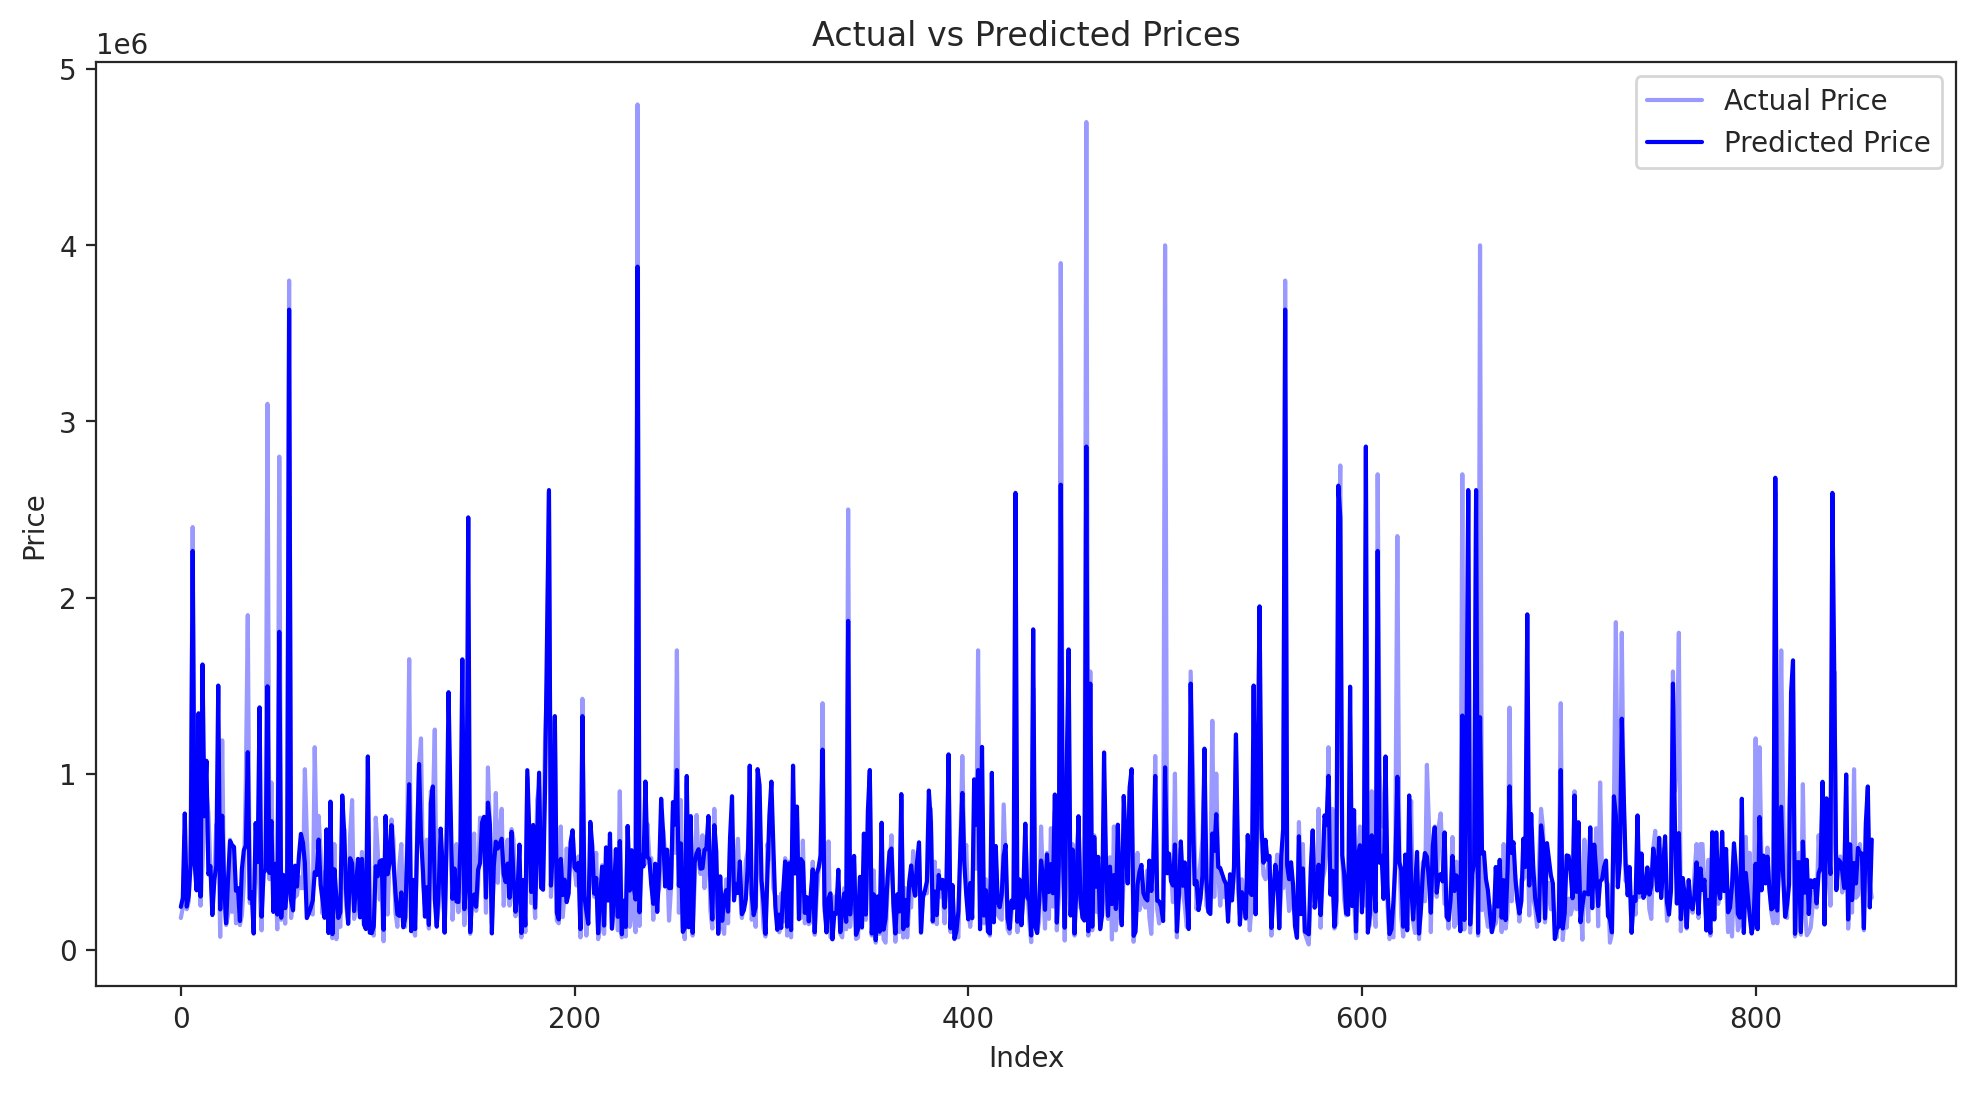

In [ ]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, color='blue', label='Actual Price',alpha=0.4)
plt.plot(indices, y_predict_test_model2, color='blue', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# 3. LinearRegression Model

Linear Regression Model as the 3rd highest r2 value based on cross validation score according to its default hyperparameters

LinearRegression() = 0.4790290829649664

In [ ]:
# loading the Linear Regression model
lr = LinearRegression()

In [ ]:
# getting the best features of Linear Regression by calling the feature selection function
best_score_lr = 0
best_features_lr = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,lr,X_train_encoded_scaled,y_train)
    if best_score_lr < score:
        best_score_lr = score
        best_features_lr = col
print(best_features_lr)
print(best_score_lr)

Selected columns:  ['transmission_Automatic']
1 28.154607988087516
----------------------

Selected columns:  ['transmission_Automatic', 'transmission_Manual']
2 28.165306250446747
----------------------

Selected columns:  ['owner_First Owner', 'transmission_Automatic', 'transmission_Manual']
3 31.619421905586936
----------------------

Selected columns:  ['owner_First Owner', 'owner_Second Owner', 'transmission_Automatic', 'transmission_Manual']
4 31.754459145850067
----------------------

Selected columns:  ['owner_First Owner', 'owner_Second Owner', 'owner_Third Owner', 'transmission_Automatic', 'transmission_Manual']
5 31.762654619229124
----------------------

Selected columns:  ['owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner', 'transmission_Automatic', 'transmission_Manual']
6 31.7804196210005
----------------------

Selected columns:  ['owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner', 'tran

Best Features : ['year', 'km_driven', 'fuel_CNG', 'fuel_Diesel', 'fuel_Petrol', 'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner', 'transmission_Automatic', 'transmission_Manual', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer']

Best Score : 0.4790290829649664

In [ ]:
# using a diffferent df to store
X_train_best_features_lr = X_train_encoded_scaled[best_features_lr]

In [ ]:
# getting the cross val score of svc with its best features
cv_score_lr = cross_val_score(lr, X_train_best_features_lr, y_train, cv=5,scoring='r2')
print(cv_score_lr)
print(cv_score_lr.mean())

[0.48561169 0.52266347 0.49556478 0.44618265 0.44512282]
0.47902908296496644


In [ ]:
# fitting the default model with its best features
lr.fit(X_train_best_features_lr,y_train)

LinearRegression()

In [ ]:
# taking only best features of lr to test data
X_test_best_features_lr = X_test_encoded_scaled[best_features_lr]

In [ ]:
# listing best features
best_features_lr

['year',
 'km_driven',
 'fuel_CNG',
 'fuel_Diesel',
 'fuel_Petrol',
 'owner_First Owner',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Third Owner',
 'transmission_Automatic',
 'transmission_Manual',
 'seller_type_Dealer',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer']

In [ ]:
# predicting the labels on test data
y_predict_lr = lr.predict(X_test_best_features_lr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae = mean_absolute_error(y_test, y_predict_lr)
mse = mean_squared_error(y_test, y_predict_lr)
rmse = root_mean_squared_error(y_test, y_predict_lr)
r2 = r2_score(y_test, y_predict_lr)

In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error (RMSE):" ,rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 232845.0487811367
Mean Squared Error (MSE): 147662451254.99493
Root Mean Squared Error (RMSE): 384268.72271236824
R-squared (R2): 0.47672226818752284


# Hyperparameter Tuning : LinearRegression Model

Linear Regression in scikit-learn is relatively straightforward and doesn't have many hyperparameters to tune compared to other more complex models.

# Final Model : LinearRegression Model

In [ ]:
# loading the Linear Regression model
model3 = LinearRegression()

In [ ]:
# fitting the training data with best features of lr
model3.fit(X_train_best_features_lr,y_train)

LinearRegression()

#Model Evaluation : LinearRegression Model

In [ ]:
# predicting the train data
y_predict_train_model3 = model3.predict(X_train_best_features_lr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_train_model3 = mean_absolute_error(y_train, y_predict_train_model3)
mse_train_model3 = mean_squared_error(y_train, y_predict_train_model3)
rmse_train_model3 = root_mean_squared_error(y_train, y_predict_train_model3)
r2_train_model3 = r2_score(y_train, y_predict_train_model3)

In [ ]:
print("Model3 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model3)
print("Mean Squared Error (MSE):",mse_train_model3)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model3)
print("R-squared (R2):", r2_train_model3)

Model3 on Training Data:
Mean Absolute Error (MAE): 225585.90061021046
Mean Squared Error (MSE): 158026003539.385
Root Mean Squared Error (RMSE): 397524.8464428167
R-squared (R2): 0.4819938077889584


In [ ]:
# predicting the test data
y_predict_test_model3 = model3.predict(X_test_best_features_lr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_test_model3 = mean_absolute_error(y_test, y_predict_test_model3)
mse_test_model3 = mean_squared_error(y_test, y_predict_test_model3)
rmse_test_model3 = root_mean_squared_error(y_test, y_predict_test_model3)
r2_test_model3 = r2_score(y_test, y_predict_test_model3)

In [ ]:
print("Model3 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model3)
print("Mean Squared Error (MSE):",mse_test_model3)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model3)
print("R-squared (R2):", r2_test_model3)

Model3 on Test Data:
Mean Absolute Error (MAE): 232845.0487811367
Mean Squared Error (MSE): 147662451254.99493
Root Mean Squared Error (RMSE): 384268.72271236824
R-squared (R2): 0.47672226818752284


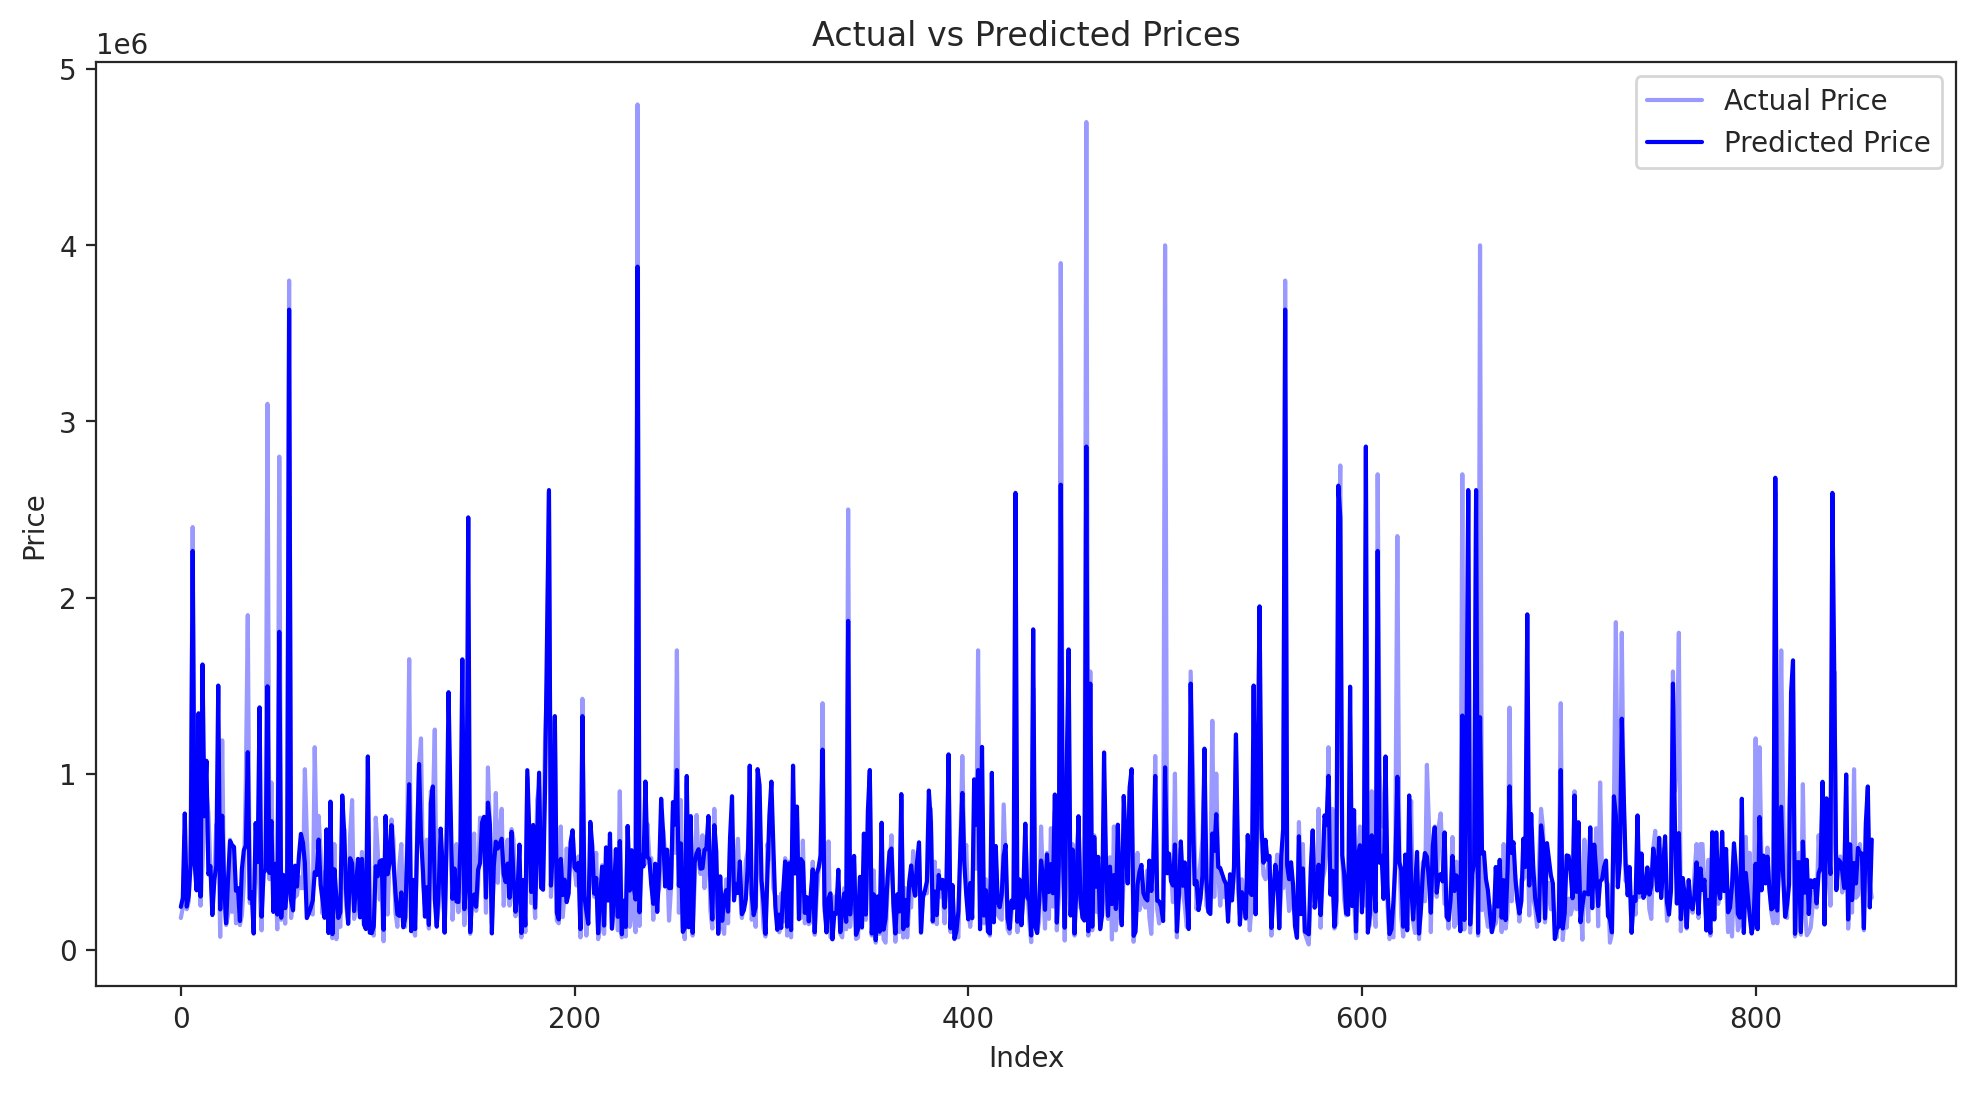

In [ ]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, color='blue', label='Actual Price',alpha=0.4)
plt.plot(indices, y_predict_test_model2, color='blue', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Conclusion


Model 1 : XG Boost Regressor

R2 value : 0.84970

R2 value : 0.63702

Model 2 : Random Forest Regressor

R2 value : 0.85378

R2 value : 0.66816

Model 3 : Linear Regression Model

R2 value : 0.48199

R2 value : 0.47672

# Predictive System

Buliding a Predictive System for here

In [ ]:
#taking input data 465000
input_data = (2014,70000,'Diesel','Dealer','Manual','First Owner')

#loading columns
columns = all_columns

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

# Encode the categorical columns
input_data_encoded = encoder.transform(df[cat_cols])

# Create a DataFrame with the encoded features
input_data_encoded_df = pd.DataFrame(input_data_encoded, columns=encoded_columns)

# Add the remaining non-categorical columns
input_data_final_encoded = pd.concat([df.drop(cat_cols, axis=1).reset_index(drop=True), input_data_encoded_df], axis=1)

# Standardize the input data
input_data_scaled = scaler.transform(input_data_final_encoded)

# Create a DataFrame with the standardized features
input_data_df = pd.DataFrame(input_data_scaled, columns=training_columns)

#loading best features
df_best_features_xgb = input_data_df[best_features_xgb]
df_best_features_rfr = input_data_df[best_features_rfr]
df_best_features_lr = input_data_df[best_features_lr]

#predictions
prediction1 = model1.predict(df_best_features_xgb)
prediction2 = model2.predict(df_best_features_rfr)
prediction3 = model3.predict(df_best_features_lr)

# Print the predictions
print(prediction1)

print(prediction2)

print(prediction3)


[515338.3]
[514339.86128872]
[650737.17655213]


Building the Predictive System to export

In [ ]:
import json
import pickle
with open('columns.pkl', 'wb') as file:
    pickle.dump(all_columns, file)
with open('cat_columns.pkl', 'wb') as file:
    pickle.dump(cat_cols, file)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('encoded_columns.pkl', 'wb') as file:
    pickle.dump(encoded_columns, file)
with open('training_columns.pkl', 'wb') as file:
    pickle.dump(training_columns, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('best_features_xgb.json', 'w') as file:
    json.dump(best_features_xgb, file)
with open('best_features_rfr.json', 'w') as file:
    json.dump(best_features_rfr, file)
with open('best_features_lr.json', 'w') as file:
    json.dump(best_features_lr, file)
with open('car_price_trained_xgb_model.sav', 'wb') as f:
    pickle.dump(model1, f)
with open('car_price_trained_rfr_model.sav', 'wb') as f:
    pickle.dump(model2, f)
with open('car_price_trained_lr_model.sav', 'wb') as f:
    pickle.dump(model3, f)

In [ ]:
#loading. the saved model
with open('columns.pkl', 'rb') as f:
    all_columns_sm = pickle.load(f)
with open('cat_columns.pkl', 'rb') as f:
    cat_columns_sm = pickle.load(f)
with open('encoder.pkl', 'rb') as f:
    encoder_sm = pickle.load(f)
with open('encoded_columns.pkl', 'rb') as f:
    encoded_columns_sm = pickle.load(f)
with open('training_columns.pkl', 'rb') as f:
    training_columns_sm = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler_sm = pickle.load(f)
with open('best_features_xgb.json', 'r') as file:
    best_features_xgb = json.load(file)
with open('best_features_rfr.json', 'r') as file:
    best_features_rfr = json.load(file)
with open('best_features_lr.json', 'r') as file:
    best_features_lr = json.load(file)
with open('car_price_trained_xgb_model.sav', 'rb') as f:
    loaded_model_xgb = pickle.load(f)
with open('car_price_trained_rfr_model.sav', 'rb') as f:
    loaded_model_rfr = pickle.load(f)
with open('car_price_trained_lr_model.sav', 'rb') as f:
    loaded_model_lr = pickle.load(f)

In [ ]:
#taking input data 110000
input_data = (2006,120000,'Diesel','Individual','Manual','Third Owner')

#loading columns
columns = all_columns_sm

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

# Encode the categorical columns
input_data_encoded = encoder_sm.transform(df[cat_columns_sm])

# Create a DataFrame with the encoded features
input_data_encoded_df = pd.DataFrame(input_data_encoded, columns=encoded_columns_sm)

# Add the remaining non-categorical columns
input_data_final_encoded = pd.concat([df.drop(cat_columns_sm, axis=1).reset_index(drop=True), input_data_encoded_df], axis=1)

# Standardize the input data
input_data_scaled = scaler_sm.transform(input_data_final_encoded)

# Create a DataFrame with the standardized features
input_data_df = pd.DataFrame(input_data_scaled, columns=training_columns_sm)

#loading best features
df_best_features_xgb = input_data_df[best_features_xgb]
df_best_features_rfr = input_data_df[best_features_rfr]
df_best_features_lr = input_data_df[best_features_lr]

#predictions
prediction1 = loaded_model_xgb.predict(df_best_features_xgb)
prediction2 = loaded_model_rfr.predict(df_best_features_rfr)
prediction3 = loaded_model_lr.predict(df_best_features_lr)

# Print the predictions
print(prediction1)

print(prediction2)

print(prediction3)


[161986.89]
[153941.19527013]
[221025.17655213]
